In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'
import torchmetrics

In [2]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
print(model)

class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5, padding=2)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d((2, 2))
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(len(x), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()

        ## define the layers
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.linear1 = nn.Linear(1024, 512)
        self.linear2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 1024) ## reshaping
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x


class ConvMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 1100)
        self.bn1= nn.BatchNorm1d(1100)
        self.fc2 = nn.Linear(1100, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
        
        self.conv1 = nn.Conv1d(1, 8, 5, padding=2)
        #self.pool1 = nn.MaxPool1d(3,stride=3)
        self.bn4=nn.BatchNorm1d(3300)
        self.conv2 = nn.Conv1d(8, 16, 5,padding=2)
        self.bn5=nn.BatchNorm1d(3300)
        self.pool2 = nn.MaxPool1d(3,stride=3)
        self.conv3=nn.Conv1d(16,1,1,stride=1)
        self.pool3=nn.MaxPool1d(3,stride=3)
        self.bn6=nn.BatchNorm1d(1100)
        #self.fc1 = nn.Linear(16*5*5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x=self.bn0(x)
        #print('x:',x.shape)
        x1= F.relu(self.drop(self.bn1(self.fc1(x))))
        #print('x1:',x1.shape)
        x0=torch.unsqueeze(x,1)
        x2=F.relu(self.conv1(x0))
        #print('x2:',x2.shape)
        x2=F.relu(self.conv2(x2))
        #print('x2:',x2.shape)
        x2=F.relu(self.conv3(x2))
        #print('x2:',x2.shape)
        x2=torch.squeeze(x2,1)
        x2=self.bn5(x2)
        x2=self.pool3(x2)
        #print('x2:',x2.shape)
        x2=self.bn6(x2)
        x3=torch.add(x1,x2)
        
        x4 = F.relu(self.drop(self.bn2(self.fc2(x3))))
        return F.softmax(self.bn3(self.fc3(x4)), dim=1) 
modelx=ConvMLP()
modelx.cuda()
print(modelx)



MLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)
ConvMLP(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1100, bias=True)
  (bn1): BatchNorm1d(1100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1100, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True

In [3]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F

class ConvMLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 1650)
        self.bn1= nn.BatchNorm1d(1650)
        self.fc2 = nn.Linear(1650, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
        
        self.conv1 = nn.Conv1d(1, 8, 5, padding=2)
        #self.pool1 = nn.MaxPool1d(3,stride=3)
        self.bn4=nn.BatchNorm1d(3300)
        self.conv2 = nn.Conv1d(8, 16, 5,padding=2)
        self.bn5=nn.BatchNorm1d(3300)
        self.pool2 = nn.MaxPool1d(3,stride=3)
        self.conv3=nn.Conv1d(16,1,1,stride=1)
        self.pool3=nn.MaxPool1d(2,stride=2)
        self.bn6=nn.BatchNorm1d(1650)
        #self.fc1 = nn.Linear(16*5*5, 120)
        #self.fc2 = nn.Linear(120, 84)
        #self.fc3 = nn.Linear(84, 10)
        self.bn7=nn.BatchNorm1d(1650)
    def forward(self, x):
        x=self.bn0(x)
        #print('x:',x.shape)
        x1= F.relu(self.drop(self.bn1(self.fc1(x))))
        #print('x1:',x1.shape)
        x0=torch.unsqueeze(x,1)
        x2=F.relu(self.conv1(x0))
        #x2=x2+x0
        #print('x2:',x2.shape)
        x2=F.relu(self.conv2(x2))
        #x2=x2+x0
        #print('x2:',x2.shape)
        x2=F.relu(self.conv3(x2))
        #print('x2:',x2.shape)
        #x2=x0+x2####skip connection
        x2=torch.squeeze(x2,1)
        x2=self.bn5(x2)
        x2=self.pool3(x2)
        #print('x2:',x2.shape)
        x2=self.bn6(x2)
        #x3=torch.add(x1,x2)
        #x3=torch.concat([x1,x2],dim=1)
        x3=torch.add(x1,x2)
        x4=self.bn7(x3)
        x4 = F.relu(self.drop(self.bn2(self.fc2(x3))))
        return F.softmax(self.bn3(self.fc3(x4)), dim=1) 
modelz=ConvMLP3()
modelz.cuda()
print(modelz)

ConvMLP3(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1650, bias=True)
  (bn1): BatchNorm1d(1650, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1650, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (conv1): Conv1d(1, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn5): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=Fal

In [4]:
import torch
#import Trainer
#from network import NFM
import torch.utils.data as Data
#from Utils.criteo_loader import getTestData, getTrainData
from torch.nn import functional as F
nfm_config = \
{
    'n_class':9,
    'linear_hidden1':2000,
    #'linear_hidden':100,#线性模型输出层（隐层个数）
    #'embed_input_dim':1001,#embed输入维度
    #'embed_dim': 100, # 用于控制稀疏特征经过Embedding层后的稠密特征大小，embed输出维度
    #'dnn_hidden_units': [100,11],#MLP隐层和输出层
    
    'dnn_hidden_units':[100,9],#MLP隐层
    'num_sparse_features_cols':10477,#the number of the gene columns
    'num_dense_features': 0,#dense features number
    'bi_dropout': 0.5,#Bi-Interaction 的dropout
    'num_epoch': 500,#训练epoch次数
    'batch_size': 16,#batch_size
    'lr': 1e-3,
    'l2_regularization': 1e-4,
    'device_id': 0,
    'use_cuda': False,
    'epoch':1000,
    
    #'train_file': '../Data/criteo/processed_data/train_set.csv',
    #'fea_file': '../Data/criteo/processed_data/fea_col.npy',
    #'validate_file': '../Data/criteo/processed_data/val_set.csv',
    #'test_file': '../Data/criteo/processed_data/test_set.csv',
    #'model_name': '../TrainedModels/NFM.model'
    #'train_file':'data/xiaoqiu_gene_5000/train/final_5000_encode_100x.csv',
    #'train_data':'dataset/qiuguan/encode/encode_1000/train/train_encode_data_1000_new.csv',
    #'train_label':'dataset/qiuguan/non_code/train/train_label.csv',
    #'guan_test_data':'dataset/qiuguan/non_code/guan_test/guan_test_data.csv',
    #'guan_test_label':'dataset/qiuguan/non_code/guan_test/guan_test_label.csv',
    #'test_data':'dataset/qiuguan/encode/encode_1000/test/test_encode_data_1000_new.csv',
    #'test_label':'dataset/qiuguan/non_code/test/test_labels.csv',
    #'title':'dataset/xiaoguan/RF/RF_for_train/train_class_9/test/test_data.csv',
    
    #'all':''
    #'title':'data/xiaoqiu_gene_5000/train/gene_5000_gene_name.csv',
    #'all':'data/xiaoqiu_gene_5000/train/gene_5000_label_name.csv'
}

#model definition
import torch.nn as nn
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(3300)
        self.fc1 = nn.Linear(3300, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model = MLP().cuda()
#print(model)

class MLP1(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(237)
        self.fc1 = nn.Linear(237, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model1 = MLP1().cuda()
print(model1)
class MLP2(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(126)
        self.fc1 = nn.Linear(126, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model2 = MLP2().cuda()
#print(model2)


class MLP3(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(177)
        self.fc1 = nn.Linear(177, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model3 = MLP3().cuda()
#print(model3)

class MLP4(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn0=nn.BatchNorm1d(131)
        self.fc1 = nn.Linear(131, 2000)
        self.bn1= nn.BatchNorm1d(2000)
        self.fc2 = nn.Linear(2000, 100)
        self.bn2=nn.BatchNorm1d(100)
        self.fc3=nn.Linear(100,9)
        self.bn3=nn.BatchNorm1d(9)
        
        self.drop=nn.Dropout(0.5)
    def forward(self, x):
        x=self.bn0(x)
        x = F.relu(self.drop(self.bn1(self.fc1(x))))
        x = F.relu(self.drop(self.bn2(self.fc2(x))))
        return F.softmax(self.bn3(self.fc3(x)), dim=1)
model4 = MLP4().cuda()

MLP1(
  (bn0): BatchNorm1d(237, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=237, out_features=2000, bias=True)
  (bn1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=2000, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
)


In [5]:
import time

import torch
import torch.nn as nn
from torch.nn import functional as F







#print(model4)
import os
import time
import argparse
import numpy as np
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter
import torch.nn.functional as F  # 激励函数的库
#import network
#import config
#import evaluate
#import data_utils
#import Trainer



def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output


def one_hot_smoothing(labels, classes, label_smoothing=0.2):
    #n = len(labels)
    n=labels.shape[0]
    eoff = label_smoothing / classes
    output = np.ones((n, classes), dtype=np.float32) * eoff
    for row, label in enumerate(labels):
        output[row, label] = 1 - label_smoothing + eoff
        #print("row:",row,"label:",label)
    return output

def one_hot(labels, classes):
    n = len(labels)
    #eoff = label_smoothing / classes
    output = np.zeros((n, classes), dtype=np.float32)
    for row, label in enumerate(labels):
        output[row, label] = 1
        #print("row:",row,"label:",label)
    return output



class KZDatasetPredict(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, df_list):
    
       
        self.data_info = self.get_data_info(df_list)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data,label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data,label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,df_list):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        print('data_info:',df_list[-1])
        #df=pd.read_csv(csv_path,sep=',')
        #df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        label=int(df_list[-1])
        labels.append(label)
        print('labels:',labels)
        data=df_list[:-1]
        #df_np=np.array(df_list)
        #print(rows,cols)
        
        #print('labels:',labels)
        labels=np.array(labels)
        print('labels.shape:',labels.shape)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        
           
        
        data=np.array(data)#
            
            
            
            
            
            
            
            
        data=torch.from_numpy(data)#
            
        labels=torch.from_numpy(labels)#
        #bi_data=embding_process(nfm_config,data)
        #print("bi_data.shape:",bi_data.shape)
            
            
        data_info.append((data,label))
        return data_info
class KZDatasetTest(data.Dataset):
    """ Construct the FM pytorch dataset. """
    #def __init__(self, file,label_file, feature_map,n_class=16):
    def __init__(self, csv_path):
    
       
        self.data_info = self.get_data_info(csv_path)
        
        
            
        
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
   
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info
import torch
import torch.nn as nn
from torch.utils.data.dataset import *
from PIL import Image
from torch.nn import functional as F
import random
from sklearn.model_selection import train_test_split
import ast
import torchvision


        

class KZDataset(Dataset):
    def __init__(self, csv_path, K,n_class,ki=0, typ='train', transform=None, rand=False):
       
        self.all_data_info = self.get_data_info(csv_path)
        
        if rand:
            random.seed(1)
            random.shuffle(self.all_data_info)
        leng = len(self.all_data_info)
        every_z_len = leng // K
        if typ == 'val':
            self.data_info = self.all_data_info[every_z_len * ki : every_z_len * (ki+1)]
        elif typ == 'train':
            self.data_info = self.all_data_info[: every_z_len * ki] + self.all_data_info[every_z_len * (ki+1) :]
            
        self.transform = transform
        
        

    def __getitem__(self, index):
        # Dataset读取图片的函数
        data, label = self.data_info[index]
        #img = Image.open(img_pth).convert('RGB')
        
        return data, label

    def __len__(self):
        return len(self.data_info)
    
    
    
    def get_data_info(self,csv_path):
        #解析路径
        #转为一维list存储，每一位为【图片路径，图片类别】
        labels=[]
        data_info=[]
        df=pd.read_csv(csv_path,sep=',')
        df=df.iloc[:,1:]
        
        #print(df.iloc[:,-1])
        #df=df.applymap(ast.literal_eval)
        rows,cols=df.shape
        
        print(rows,cols)
        for i in df.iloc[:,-1]:
            #print(i)
            labels.append(int(i))
        #print('labels:',labels)
        labels=np.array(labels)
        #print('labels:',labels)
        #labels=np.array(labels)
        labels=one_hot_smoothing(labels,nfm_config['n_class'])
        #print(labels)
        for i in range(rows):
            data=df.iloc[i,:-1]
            data=data.astype(float)#
            data=np.array(data)#
            
            label=labels[i]
            #print(data.shape)
            #print(label.shape)
            #label=label.tolist()
            data=torch.from_numpy(data)#
            label=torch.from_numpy(label)#
            
            
            data_info.append((data,label))
        return data_info

In [6]:
from torch.autograd import Variable
from torch.utils.data import DataLoader
from sklearn.metrics import roc_auc_score
#from new_nfm_network import NFM
import os
import time
import argparse
import numpy as np
import pandas as pd 
import sys

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
#import torch.backends.cudnn as cudnn
#3from tensorboardX import SummaryWriter



In [7]:
#import torchmetrics
            

from torchmetrics.classification import accuracy

def train_epoch(model,train_loader,batch_size,optimizer,loss_func):
    BATCH_SIZE=batch_size
    total = 0
    correct=0
    total_loss=0
    #
    model.train()
    total_train_accuracy=0  
    for batch_idx, (x, labels) in enumerate(train_loader):
            
        labels = Variable(labels)
        x = Variable(x)
            
            
        x=torch.tensor(x,dtype=torch.float)
        labels=torch.tensor(labels,dtype=torch.float)
        x, labels = x.cuda(), labels.cuda()
        labels_int=labels=torch.max(labels,1)[1]
            
            
        optimizer.zero_grad()
        y_predict = model(x)
            
        loss = loss_func(y_predict, labels)
        loss.backward()
        optimizer.step()
            
        loss = loss.item()
           

        total_loss += loss
            
            
            
        #
        '''
        train_acc_en=torchmetrics.Accuracy(task='multiclass',num_classes=9).cuda()
        batch_train_acc=train_acc_en(y_predict,labels_int)
        '''
        batch_train_acc=torchmetrics.functional.accuracy(y_predict,labels_int)
        #batch_train_acc=torchmetrics.classification.Accuracy(y_predict,labels_int)
        
        
        
        #train_acc_en=accuracy(y_predict,labels_int)
        #batch_train_acc=train_acc_en()
        
        total_train_accuracy+=batch_train_acc
            
    total_train_accuracy/=(batch_idx+1)
    print('total_train_accuracy:',total_train_accuracy)
    print("Training Epoch: %d, total loss: %f" % (epoch_id, total_loss))
    return total_loss,total_train_accuracy

def val_epoch(model,test_loader,batch_size,optimizer): 
    batch_size_num=0
    total_test_acc=0
    model.eval()
    for i , (inputs , targets) in enumerate(test_loader):   
            print("test")
            
            inputs = Variable(inputs)   
            targets = Variable(targets)     
           
            inputs=torch.tensor(inputs ,dtype=torch.float)   
            targets=torch.tensor(targets ,dtype=torch.float)   
            inputs , targets = inputs.cuda(),  targets.cuda()   
            yhat = model(inputs)  
            
            
            
            targets=torch.max(targets,1)[1]
            
            
            
            #test_acc_en=torchmetrics.Accuracy(task='multiclass',num_classes=9).cuda()
            batch_test_acc=torchmetrics.functional.accuracy(yhat,targets)
            
            total_test_acc+=batch_test_acc
            
            batch_size_num=i
    total_test_acc/=(batch_size_num+1)
        ###print('total_test_accuracy:',total_test_acc/(batch_size+1))
    print('total_test_accuracy:',total_test_acc)
        
                    
                    
            
            
    
        
   
    
    return total_test_acc


import numpy as np
import math
import matplotlib.pyplot as plt

def plotLoss(loss,epoch):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(8, 5))
    x=[i for i in range(epoch)]
    #acc_train=acc_train.cpu()
    #acc_test=acc_test.cpu()
    plt.plot(x, loss, 'r-', mec='k', label='Logistic Loss', lw=2)
    #plt.plot(x,acc_train,'b-',mec='k',label='accuracy Train',lw=2)
    #plt.plot(x,acc_test,'g-',mec='k',label='accuracy Test',lw=2)
    #plt.plot(x, y_01, 'g-', mec='k', label='0/1 Loss', lw=2)
    #plt.plot(x, y_hinge, 'b-',mec='k', label='Hinge Loss', lw=2)
    #plt.plot(x, boost, 'm--',mec='k', label='Adaboost Loss',lw=2)
    plt.grid(True, ls='--')
    plt.legend(loc='upper right')
    plt.title('损失函数')
    plt.show()
 


549 3301
549 3301


/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


total_train_accuracy: tensor(0.1396, device='cuda:0')
Training Epoch: 0, total loss: 65.552040
total_train_accuracy: tensor(0.3375, device='cuda:0')
Training Epoch: 1, total loss: 62.915239
total_train_accuracy: tensor(0.4417, device='cuda:0')
Training Epoch: 2, total loss: 61.337015
total_train_accuracy: tensor(0.5125, device='cuda:0')
Training Epoch: 3, total loss: 60.129169
total_train_accuracy: tensor(0.5688, device='cuda:0')
Training Epoch: 4, total loss: 59.523825
total_train_accuracy: tensor(0.6667, device='cuda:0')
Training Epoch: 5, total loss: 57.795680
total_train_accuracy: tensor(0.6958, device='cuda:0')
Training Epoch: 6, total loss: 56.863432
total_train_accuracy: tensor(0.7021, device='cuda:0')
Training Epoch: 7, total loss: 56.495872
total_train_accuracy: tensor(0.7375, device='cuda:0')
Training Epoch: 8, total loss: 55.450955
total_train_accuracy: tensor(0.7813, device='cuda:0')
Training Epoch: 9, total loss: 54.743420
total_train_accuracy: tensor(0.7479, device='cuda:

total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 86, total loss: 45.004652
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 87, total loss: 45.467363
total_train_accuracy: tensor(0.9396, device='cuda:0')
Training Epoch: 88, total loss: 45.322682
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 89, total loss: 44.736821
total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 90, total loss: 45.338016
total_train_accuracy: tensor(0.9500, device='cuda:0')
Training Epoch: 91, total loss: 45.024215
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 92, total loss: 45.005148
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 93, total loss: 45.334835
total_train_accuracy: tensor(0.9333, device='cuda:0')
Training Epoch: 94, total loss: 45.693956
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 95, total loss: 44.949109
total_train_accuracy: tensor(0.9354, dev

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


total_train_accuracy: tensor(0.9521, device='cuda:0')
Training Epoch: 100, total loss: 44.786319
the  0  epoch ends


/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25439 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 22833 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 20989 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/zhengfang/anaconda3/envs/new_pytorch/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


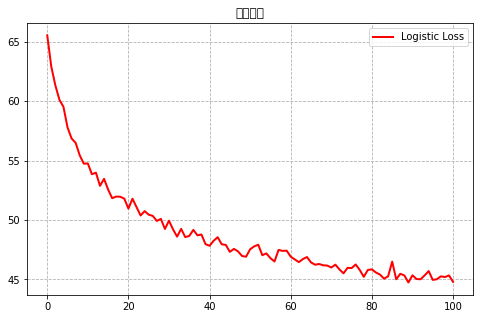

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


test
test
test
total_test_accuracy: tensor(0.8125, device='cuda:0')
acc_test_each_k: tensor(0.8125, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9146, device='cuda:0')
Training Epoch: 0, total loss: 45.808455
total_train_accuracy: tensor(0.9458, device='cuda:0')
Training Epoch: 1, total loss: 45.295425
total_train_accuracy: tensor(0.9479, device='cuda:0')
Training Epoch: 2, total loss: 45.002909
total_train_accuracy: tensor(0.9271, device='cuda:0')
Training Epoch: 3, total loss: 45.421593
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 4, total loss: 45.240293
total_train_accuracy: tensor(0.9313, device='cuda:0')
Training Epoch: 5, total loss: 45.610413
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 6, total loss: 45.194892
total_train_accuracy: tensor(0.9375, device='cuda:0')
Training Epoch: 7, total loss: 44.952182
total_train_accuracy: tensor(0.9417, device='cuda:0')
Training Epoch: 8, total loss: 45.394452
total_trai

total_train_accuracy: tensor(0.9563, device='cuda:0')
Training Epoch: 85, total loss: 43.621843
total_train_accuracy: tensor(0.9583, device='cuda:0')
Training Epoch: 86, total loss: 43.746515
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 87, total loss: 43.339005
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 88, total loss: 43.127713
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 89, total loss: 42.911217
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 90, total loss: 43.448511
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 91, total loss: 43.500514
total_train_accuracy: tensor(0.9604, device='cuda:0')
Training Epoch: 92, total loss: 43.565521
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 93, total loss: 43.384545
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 43.016073
total_train_accuracy: tensor(0.9771, dev

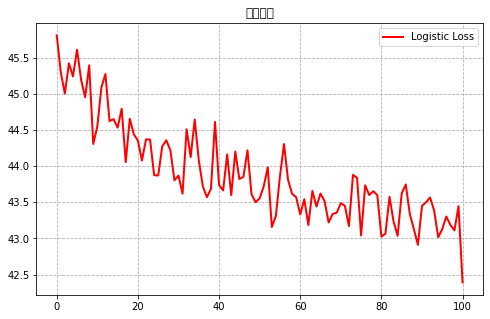

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9354, device='cuda:0')
Training Epoch: 0, total loss: 43.961597
total_train_accuracy: tensor(0.9625, device='cuda:0')
Training Epoch: 1, total loss: 43.355809
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 43.260314
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 3, total loss: 43.357605
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 4, total loss: 43.573427
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 5, total loss: 43.354787
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 6, total loss: 43.256670
total_train_accuracy: tensor(0.9542, device='cuda:0')
Training Epoch: 7, total loss: 43.431715
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 8, total loss: 42.939981
total_train_accura

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.647745
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 86, total loss: 42.578778
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.379771
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.440863
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 89, total loss: 42.255000
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 90, total loss: 42.838414
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 91, total loss: 42.569639
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 92, total loss: 42.154949
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 93, total loss: 42.244591
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 94, total loss: 42.264317
total_train_accuracy: tensor(0.9771, dev

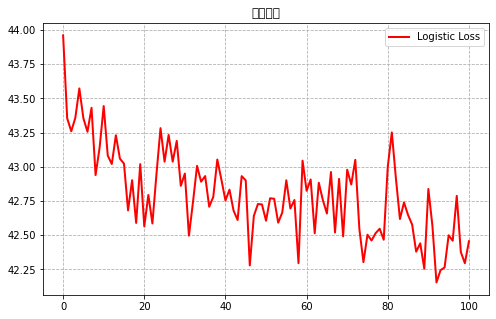

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 0, total loss: 42.552084
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 1, total loss: 42.419032
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 2, total loss: 42.348263
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 3, total loss: 42.469320
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 4, total loss: 42.899517
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 5, total loss: 42.615987
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 6, total loss: 42.544406
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 7, total loss: 42.610747
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 8, total loss: 42.684346
total_train_accura

total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 85, total loss: 42.568063
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 86, total loss: 41.988538
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.234544
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 88, total loss: 42.236015
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 89, total loss: 41.929007
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.339367
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 91, total loss: 42.382934
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 92, total loss: 42.378586
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 93, total loss: 42.639590
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 94, total loss: 42.242589
total_train_accuracy: tensor(0.9792, dev

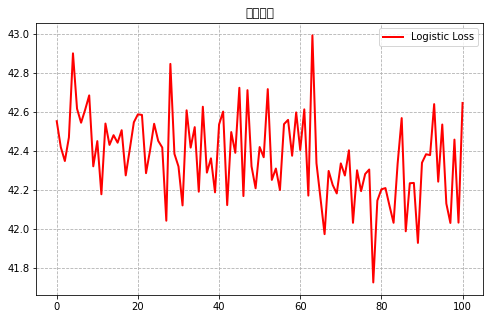

test
test
test
total_test_accuracy: tensor(0.9792, device='cuda:0')
acc_test_each_k: tensor(0.9792, device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 0, total loss: 42.790514
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 1, total loss: 42.574163
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 2, total loss: 42.414198
total_train_accuracy: tensor(0.9688, device='cuda:0')
Training Epoch: 3, total loss: 42.459255
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 4, total loss: 42.462558
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 5, total loss: 42.420886
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 6, total loss: 42.208404
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 7, total loss: 42.068708
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 8, total loss: 42.170333
total_trai

total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 85, total loss: 42.337747
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 86, total loss: 42.100289
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 42.330167
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 88, total loss: 42.306318
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 89, total loss: 42.141226
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 90, total loss: 42.140801
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.213420
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 92, total loss: 42.313113
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.165686
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 94, total loss: 41.937892
total_train_accuracy: tensor(0.9896, dev

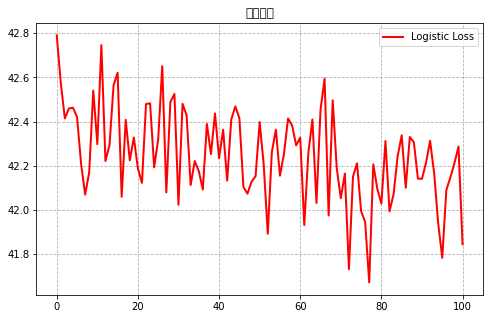

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 0, total loss: 42.302808
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 1, total loss: 42.206062
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 2, total loss: 42.499333
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 3, total loss: 42.224531
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.240817
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 5, total loss: 42.481535
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 6, total loss: 42.125310
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 7, total loss: 42.169181
total_train_accuracy: tensor(0.9750, device='cuda:0')
Training Epoch: 8, total loss: 42.250141
total_train_accura

total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 85, total loss: 41.845665
total_train_accuracy: tensor(0.9729, device='cuda:0')
Training Epoch: 86, total loss: 42.382118
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 87, total loss: 42.006276
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 88, total loss: 41.870408
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 89, total loss: 42.328729
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 90, total loss: 42.017776
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 91, total loss: 41.928396
total_train_accuracy: tensor(0.9646, device='cuda:0')
Training Epoch: 92, total loss: 42.545659
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 93, total loss: 42.051566
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 94, total loss: 42.185061
total_train_accuracy: tensor(0.9813, dev

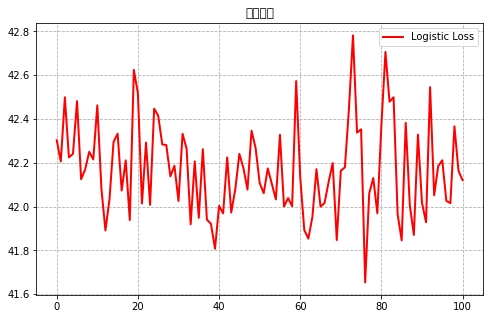

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301
549 3301
total_train_accuracy: tensor(0.9708, device='cuda:0')
Training Epoch: 0, total loss: 42.571098
total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 1, total loss: 42.187971
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 2, total loss: 42.132134
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 3, total loss: 41.932793
total_train_accuracy: tensor(0.9792, device='cuda:0')
Training Epoch: 4, total loss: 42.274716
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 5, total loss: 42.344928
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 6, total loss: 41.995346
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 7, total loss: 42.063172
total_train_accuracy: tensor(0.9896, device='cuda:0')
Training Epoch: 8, total loss: 42.001575
total_train_accura

total_train_accuracy: tensor(0.9917, device='cuda:0')
Training Epoch: 85, total loss: 41.955697
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 86, total loss: 42.140221
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 87, total loss: 41.985807
total_train_accuracy: tensor(0.9875, device='cuda:0')
Training Epoch: 88, total loss: 42.048840
total_train_accuracy: tensor(0.9771, device='cuda:0')
Training Epoch: 89, total loss: 42.423715
total_train_accuracy: tensor(0.9854, device='cuda:0')
Training Epoch: 90, total loss: 42.018112
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 91, total loss: 42.143348
total_train_accuracy: tensor(0.9938, device='cuda:0')
Training Epoch: 92, total loss: 41.854826
total_train_accuracy: tensor(0.9833, device='cuda:0')
Training Epoch: 93, total loss: 42.013346
total_train_accuracy: tensor(0.9813, device='cuda:0')
Training Epoch: 94, total loss: 42.114498
total_train_accuracy: tensor(0.9875, dev

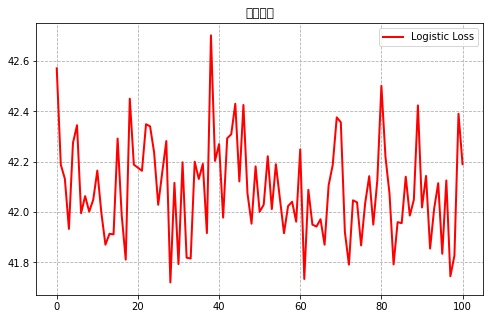

test
test
test
total_test_accuracy: tensor(1., device='cuda:0')
acc_test_each_k: tensor(1., device='cuda:0')
549 3301


In [ ]:
model=modelz
K=10
test_metrics=[]
train_loss_total_list=[]
for ki in range(K):
    trainset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv',K=K, n_class=nfm_config['n_class'],ki=ki,  typ='train', transform=None, rand=True)
    valset = KZDataset(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/train_val_info.csv', K=K,n_class=nfm_config['n_class'],ki=ki,  typ='val', transform=None, rand=True)
    train_loader = data.DataLoader(
         dataset=trainset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size'],
         shuffle=True)
    val_loader = data.DataLoader(
         dataset=valset,
         #transform=torchvision.transforms.ToTensor(),
         drop_last=True,
         batch_size=nfm_config['batch_size']
        
     )
    
    model_path='models/ConvMLP3/'
    #BATCH_SIZE=batch_size
    optimizer = torch.optim.Adam(model.parameters(), lr=nfm_config['lr'], weight_decay=nfm_config['l2_regularization'])
    #total = 0
    
    
    loss_func=torch.nn.CrossEntropyLoss()
    
    num=0
   
    
    epoches=101
    for epoch_id in range(epoches):
          
        
        
        train_loss_total,acc_train=train_epoch(model,train_loader,nfm_config['batch_size'],optimizer,loss_func)
        train_loss_total_list.append(train_loss_total)#
        if epoch_id %20==0:
            num=num+1
            #path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pkl')
            #torch.save(model.state_dict(),path)
            # 保存模型
            
            path=os.path.join(model_path,'MLP'+str(num)+str(K)+'.pt')##################pt
            torch.save(model.state_dict(),path)
            #torch.save(model.state_dict(),path)
    print("the ",ki," epoch ends")
    plotLoss(train_loss_total_list,epoches)
    train_loss_total_list=[]
    acc_test=val_epoch(model,val_loader,nfm_config['batch_size'],optimizer)
    print("acc_test_each_k:",acc_test)
    test_metrics.append(acc_test)

print(test_metrics)
#test_metrics=test_metrics.tolist()
test_metrics=[x.cpu().detach().numpy() for x in test_metrics]
print(test_metrics)
acc_test_metrics=np.mean(test_metrics) 
print("acc_test_metrics:",acc_test_metrics)
       


ConvMLP3(
  (bn0): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=3300, out_features=1650, bias=True)
  (bn1): BatchNorm1d(1650, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1650, out_features=100, bias=True)
  (bn2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=100, out_features=9, bias=True)
  (bn3): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (drop): Dropout(p=0.5, inplace=False)
  (conv1): Conv1d(1, 8, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn4): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv1d(8, 16, kernel_size=(5,), stride=(1,), padding=(2,))
  (bn5): BatchNorm1d(3300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool1d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=Fal

/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:59: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/zhengfang/.local/lib/python3.6/site-packages/ipykernel_launcher.py:60: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or 

f1_score:  %.4f 0.8696440861095376
accuracy_score: 0.8623188405797102
recall_score: 0.8640704828940123
pre_recall: 0.8840973387542015
n_classes: 9


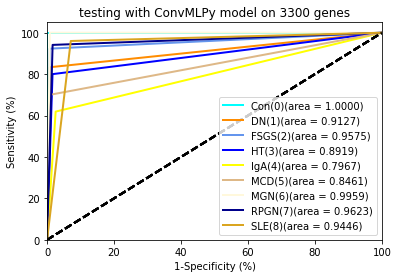

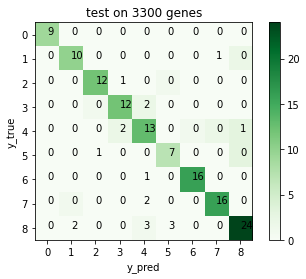

In [8]:
import torch

#功能：加载保存到path中的各层参数到神经网络

#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP610.pkl'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP9110.pkl'
#path='models/ConvMLPy/ConvMLPy_skip/MLP610.pt'
path='models/ConvMLP3/MLP610.pt'
#path='dataset/qiuguan/model_new_K_fold_RandomTree/MLP_non_encode/MLP10910.pkl'
#nfm=NFM(nfm_config)
#mlp=MLP()
mlp=ConvMLP3()
#print(nfm)
#net = nn.DataParallel(net)
#net = net.to(device)
mlp.load_state_dict(torch.load(path),strict=False)
mlp.cuda()

print(mlp)




mlp_params = list(mlp.named_parameters())
#print(nfm_params)
net=mlp


testset = KZDatasetTest(csv_path='dataset/qiuguan/origin_800/xiaoqiu_xiaoguan/test_info.csv')
   
test_loader = data.DataLoader(
         dataset=testset,
         #transform=torchvision.transforms.ToTensor(),
         
         batch_size=nfm_config['batch_size']
        
     )
#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/121708431# 
from torch.autograd import Variable 
from torch.utils.data import DataLoader 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import accuracy_score 
 
def evaluate_model(test_dl, model): 
    model.eval()#测试数据稳定
    predictions, actuals = [], [] 
    for i, (inputs, targets) in enumerate(test_dl): 
        # evaluate the model on the test set 
        #print(\ inputs:\ ,inputs) 
        #print(\ targets:\ ,targets) 
        inputs = Variable(inputs) 
        targets = Variable(targets) 
                 
                 
        #x = torch.tensor(x, dtype=torch.float) 
        #x=x.clone().detach().requires_grad_(True) 
        inputs=torch.tensor(inputs,dtype=torch.float) 
        targets=torch.tensor(targets,dtype=torch.float) 
        inputs, targets = inputs.cuda(), targets.cuda() 
        yhat = model(inputs) 
        yhat=(yhat==torch.max(yhat,1,keepdim=True)[0]).to(dtype=torch.int32)
        # retrieve numpy array 
        #yhat = yhat.detach().numpy() 
        yhat = yhat.detach().cpu().numpy()#转换到cpu 
        # yhat=yhat.argmax(axis=1) 
        #print(yhat:\ ,yhat) 
        #print('yhat.shape:',yhat.shape) 
        actual = targets.detach().cpu().numpy() 
        actual=actual.round() 
        #print(\ actual:\ ,actual) 
        #print('actual.shape:',actual.shape
        #predictions.appe) 
        #actual = actual.reshape(-1, 1) 
        # round to class values 
        yhat = yhat.round() 
        # store nd(yhat) 
        actuals.append(actual) 
        predictions.append(yhat)
    #print("prediction:" ,predictions) 
    #print("actuals:",actuals) 
    predictions, actuals = np.vstack(predictions), np.vstack(actuals) 
    #print("prediction:" ,predictions) 
    #print("actuals:" ,actuals) 
    # calculate accuracy 
    acc_test = accuracy_score(actuals, predictions) 
    return  actuals, predictions,acc_test 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 
from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 

import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


import torch.nn.functional as F 

actuals,predictions,acc_test=evaluate_model(test_loader,net)


from sklearn.metrics import precision_recall_curve, average_precision_score,roc_curve, auc, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score 
target_list=actuals 
pred_list=predictions 
      
y_true=target_list 
y_pred=pred_list 
      
f1=f1_score(y_true=target_list, y_pred=pred_list, average='macro') # 也可以指定micro模式 
acc_score=accuracy_score(y_true=target_list, y_pred=pred_list) 
rec_score=recall_score(y_true=target_list,y_pred=pred_list,average='macro') # 也可以指定micro模式 
pre_recall=precision_score(y_true=target_list,y_pred=pred_list,average='macro') 
print("f1_score:  %.4f" ,f1) 
print("accuracy_score:" ,acc_score) 
print("recall_score:",rec_score) 
print("pre_recall:" ,pre_recall)



auc_curve = roc_auc_score(y_true, y_pred, multi_class='ovo')
#———————————————— 
#版权声明：本文为CSDN博主「农民小飞侠」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/w5688414/article/details/106595892 
PM_y=y_pred 
true_y=y_true 
n_classes=PM_y.shape[1] 
      
print("n_classes:",n_classes) 
fpr = dict() 
tpr = dict() 
roc_auc = dict() 
for i in range(n_classes): 
    fpr[i], tpr[i], _ = roc_curve(true_y[:, i], PM_y[:, i]) 
    roc_auc[i] = auc(fpr[i], tpr[i]) 
    #print(i) 
    #print(fpr) 
    #print(tpr) 
    
    
    
#计算macro auc 
from scipy import interp 
# First aggregate all false positive rates 
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) 
       
# Then interpolate all ROC curves at this points 
mean_tpr = np.zeros_like(all_fpr) 
for i in range(n_classes): 
    mean_tpr += interp(all_fpr, fpr[i], tpr[i]) 
       
    # Finally average it and compute AUC 
    mean_tpr /= n_classes 
       
    fpr["macro"] = all_fpr 
    tpr["macro"] = mean_tpr 
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])
    
    
    
#画图 
      
import matplotlib.pyplot as plt 
from itertools import cycle 
from matplotlib.ticker import FuncFormatter 
lw = 2 
# Plot all ROC curves 
plt.figure() 
labels=['Con(0)','DN(1)','FSGS(2)','HT(3)','IgA(4)','MCD(5)','MGN(6)','RPGN(7)','SLE(8)'] 

'''
plt.plot(fpr["macro"], tpr["macro"], 
              label='macro-average ROC curve (area = {0:0.4f})' 
                    ''.format(roc_auc["macro"]), 
              color='navy', linestyle=':', linewidth=4) 
'''

       
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','blue','yellow','burlywood','cornsilk','darkblue','goldenrod','greenyellow','maroon']) 
for i, color in zip(range(n_classes), colors): 
    plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                  label=labels[i]+'(area = {0:0.4f})'.format(roc_auc[i])) 
       
    plt.plot([0, 1], [0, 1], 'k--', lw=lw) 
    plt.xlim([0.0, 1.0]) 
    plt.ylim([0.0, 1.05]) 
      
      
    plt.xlabel('1-Specificity (%)') 
    plt.ylabel('Sensitivity (%)') 
    #plt.title('testing on kidney tubules with F800 without augment') 
    plt.title('testing with ConvMLPy model on 3300 genes')   

        
def to_percent(temp, position): 
    return '%1.0f'%(100*temp) 
      
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.gca().xaxis.set_major_formatter(FuncFormatter(to_percent)) 
plt.legend(loc="lower right" ) 
      
plt.show() 

#———————————————— 
#版权声明：本文为CSDN博主「山阴少年」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。 
#原文链接：https://blog.csdn.net/jclian91/article/details/103074506/ 
      
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
      
# 支持中文字体显示, 使用于Mac系统 
#zhfont=mpl.font_manager.FontProperties(fname=\ /Library/Fonts/Songti.ttc\ ) 
      
y_true=actuals# = ['北京', '上海', '成都', '成都', '上海', '北京', '上海', '成都', '北京', '上海'] 
y_pred=predictions #= ['北京', '上海', '成都', '上海', '成都', '成都', '上海', '成都', '北京', '上海'] 
      
#ValueError: multilabel-indicator is not supported 
      
classes = [0,1,2,3,4,5,6,7,8] 
#confusion = confusion_matrix(y_true, y_pred)#ValueError: multilabel-indicator is not supported 
      
confusion = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1)) 
# 绘制热度图 
plt.imshow(confusion, cmap=plt.cm.Greens) 
indices = range(len(confusion)) 
#plt.xticks(indices, classes, fontproperties=zhfont) 
#plt.yticks(indices, classes, fontproperties=zhfont) 
      
plt.xticks(indices, classes) 
plt.yticks(indices, classes) 
plt.colorbar() 
plt.xlabel('y_pred') 
plt.ylabel('y_true') 
plt.title('test on 3300 genes')      
# 显示数据 
for first_index in range(len(confusion)): 
    for second_index in range(len(confusion[first_index])): 
        plt.text(first_index, second_index, confusion[first_index][second_index]) 
      
# 显示图片 
plt.show()